# Numpy


### Wy Numpy?

1. You can plot the logo:

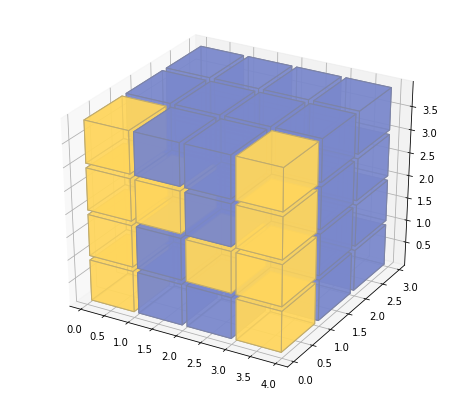

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

fig = plt.figure(figsize=(8,7))
ax = fig.gca(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
plt.show()

NumPy is the fundamental package needed for scientific computing with Python.

It provides:

+ a powerful N-dimensional array object
+ sophisticated (broadcasting) functions
+ tools for integrating C/C++ and Fortran code
+ useful linear algebra, Fourier transform, and random number capabilities


In [2]:
[x**2 for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [3]:
np.arange(10)**2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

+ it is _fast_:

In [4]:
%timeit [x**2 for x in list(range(int(10e6)))]

2.32 s ± 5.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit np.arange(10e6)**2

37.5 ms ± 196 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


What makes numpy so fast?

_The data structure!_

a Numpy array is a sequence of elements that are contiguos in the memory space!

but not always is faster:

In [6]:
%timeit np.array([1]) + np.array([1])

1.56 µs ± 20.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
%timeit 1 + 1

8.24 ns ± 0.024 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


## The `ndarray` 

NumPy’s main object is the **homogeneous** multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called _axes_.

In [9]:
import numpy as np

To **create an array** we can do:

In [2]:
# from a python object. i.e. list
a = np.array([1,2,3,4])
a

array([1, 2, 3, 4])

In [3]:
type(a)

numpy.ndarray

use Numpy placeholders:

In [4]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [5]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [24]:
np.empty(10)  #  Array of uninitialized (arbitrary) data of the given shape, dtype

array([7.57664141e-312, 2.02566915e-322, 0.00000000e+000, 0.00000000e+000,
       1.33508845e-306, 1.16095484e-028, 5.98117540e-114, 6.32672818e+180,
       4.74483502e+170, 1.57412206e-076])

or the familiar `range`

In [25]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### `ndarray` attributes

In [5]:
# returns the shape of the array (rows, columns)
# if array is 1d returns (n,)
a.shape

(4,)

In [5]:
# returns data type
a.dtype

dtype('int64')

In [22]:
# number of dimensions
a.ndim

1

In [6]:
# returns memory flags
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

let's see a two dimension array

In [11]:
aa = np.arange(12).reshape(3,4)
aa

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [12]:
aa.shape

(3, 4)

In [13]:
aa.ndim

2

## Numpy universal function

Operations over arrays are elementwise and fast

```python
np.sum()
np.min()
np.max()
np.cumsum()
np.mean()
np.median()
np.corrcoef()
np.std()
```

In [15]:
a = np.arange(1000)

In [16]:
L = range(1000)

In [28]:
np.sum(L)

499500

In [20]:
np.sum(a)

499500

In [21]:
np.cumsum(np.arange(10))

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

## Slicing `ndarray`

`ndarrays` uses a slicing method similar to to plain python lists or tuples: 

    [start:stop:stride]

Since arrays can have arbitrary number of axes, the slicing for every axes is separated by commas:

    [axis 0, axis 1, ...axis n]

In [10]:
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [34]:
arr[0]  # 1st row

array([0, 1, 2])

In [35]:
arr[:,0] # all rows, column 0

array([0, 3, 6])

In [40]:
arr[0,0]

0

In [39]:
arr[::-1]  # reverse rows

array([[6, 7, 8],
       [3, 4, 5],
       [0, 1, 2]])

In [42]:
arr[::-1, ::-1]  # reverse columns

array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])

In [47]:
arr[::2, ::2]

array([[0, 2],
       [6, 8]])

### `nparrays` can be reshaped 

In [6]:
arr = np.arange(15).reshape(3,5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [7]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [9]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Numpy offers a huge amount of **[array manipulation routines](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html)**

## Indexing


Numpy indexing is prety straight forward. We have already used the `[idx]` operator 

In [18]:
arr = np.arange(10) ** 2
arr[4]

16

But numpy also supports more complex ways of accessing the elements by its index. 

### Boolean indexing

Boolean indexing uses an array of boolean elements to retrieve the array elements tha match with a `True`

In [19]:
arr % 2 == 0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [20]:
arr[arr % 2 == 0]  # note that both arrays need to have the same length 

array([ 0,  4, 16, 36, 64])

### Fancy indexing

Numpy arrays can be also indexed by arrays of integers. They behave as they are arrays of indexex.

In [21]:
np.where(arr % 3 == 0)

(array([0, 3, 6, 9]),)

In [22]:
arr[np.where(arr % 3 == 0)]

array([ 0,  9, 36, 81])

## Iterating over arrays

It's not the best idea to use a `for` loop over a numpy array. But if you are to lazy to vectorize your algorithm...: 

In [24]:
arr = np.arange(12).reshape(3,4)  # defines a 3x4 array

for row in arr:
    print(row)

[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]


In [25]:
for e in arr.flat:
    print(e)

0
1
2
3
4
5
6
7
8
9
10
11


## Dot product in pure Python vs Numpy 

The dot product of two vectors **a** = [a1, a2, ..., an] and **b** = [b1, b2, ..., bn] is defined as:
$$ \mathbf{a} \cdot \mathbf {b} =\sum _{i=1}^{n}a_{i}b_{i}=a_{1}b_{1}+a_{2}b_{2}+\cdots +a_{n}b_{n} $$

In [ ]:
# let's define some vectors [0,1,2...n]
n = 100000

# vectors as python lists
vec1 = list(range(n))
vec2 = list(range(n))

# vectors as numpy arrays
arr1 = np.arange(n)
arr2 = np.arange(n)

assert arr1.tolist() == vec1
assert arr2.tolist() == vec2

In [ ]:
# Pure python implementation of dot product
def dot_product(v1, v2):
    
    assert len(v1) == len(v2)
    result = 0
    for i in  range(len(v1)):
        result += v1[i] * v2[i]
        
    return result

In [ ]:
dot_product(vec1, vec2) == np.dot(arr1, arr2)

_- Wait? what??_

In [ ]:
dot_product(vec1, vec2) == np.dot(arr1, arr2)

I think we implemented `dot_product` correctly 🤔

why are the results diferent?

In [ ]:
python_result = dot_product(vec1, vec2)
python_result

In [ ]:
numpy_result = np.dot(arr1, arr2)
numpy_result

The problem is that the elements of `arr1` and `arr2` are [`int32`, 32 bits integers](https://docs.scipy.org/doc/numpy/user/basics.types.html)!


In [ ]:
arr1.dtype

the max number that can be represented with 32 bits is $2^{32}$:

-2147483648 to 2147483647 !

if we use `int64` the problem will be solved